In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [169]:
stasiun1 = pd.read_csv('C:\\Users\\fayme amelia celesta\\Documents\\VScode\\Github\\Intern-BCC-2024\\Code\\EDA\\stasiun_1_intrp.csv')

In [170]:
stasiun1

,Unnamed: 0,Tavg,RH_avg,RR,ss,ddd_x,ff_avg
0,2016-01-01,28.6,81.0,9.239964,5.8,280.0,2.0
1,2016-01-02,27.0,88.0,1.600000,8.7,290.0,2.0
2,2016-01-03,28.1,80.0,33.800000,5.4,280.0,2.0
3,2016-01-04,29.2,81.0,23.800000,6.6,200.0,1.0
4,2016-01-05,26.7,91.0,13.800000,3.2,180.0,1.0
...,...,...,...,...,...,...,...
1822,2020-12-27,29.0,74.0,0.000000,5.7,240.0,2.0
1823,2020-12-28,28.1,77.0,0.050000,6.8,240.0,3.0
1824,2020-12-29,27.1,82.0,0.100000,6.1,240.0,3.0
1825,2020-12-30,27.0,81.0,0.300000,1.4,260.0,2.0


In [171]:
stasiun1.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
stasiun1['date'] = pd.to_datetime(stasiun1['date'])

In [172]:
def get_model(data, column):
    df_train = data[['date', column]]
    df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
    
    my_model = Prophet()
    my_model.fit(df_train)
    
    return my_model

### Create Rainfall Prediction Model

In [173]:
model_RR = get_model(stasiun1, 'RR')

C:\Users\fayme amelia celesta\AppData\Local\Temp\ipykernel_14804\1345731877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
20:21:47 - cmdstanpy - INFO - Chain [1] start processing
20:21:47 - cmdstanpy - INFO - Chain [1] done processing


In [174]:
future_dates = model_RR.make_future_dataframe(periods=365, freq='D')
future_dates.shape[0]

2192

In [175]:
forecast = model_RR.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2016-01-01,14.496083,-3.789376,32.718437
1,2016-01-02,15.144074,-3.111769,33.418108
2,2016-01-03,15.348915,-2.531342,33.578896
3,2016-01-04,14.973873,-2.799757,33.357542
4,2016-01-05,16.086439,-2.315902,33.012575


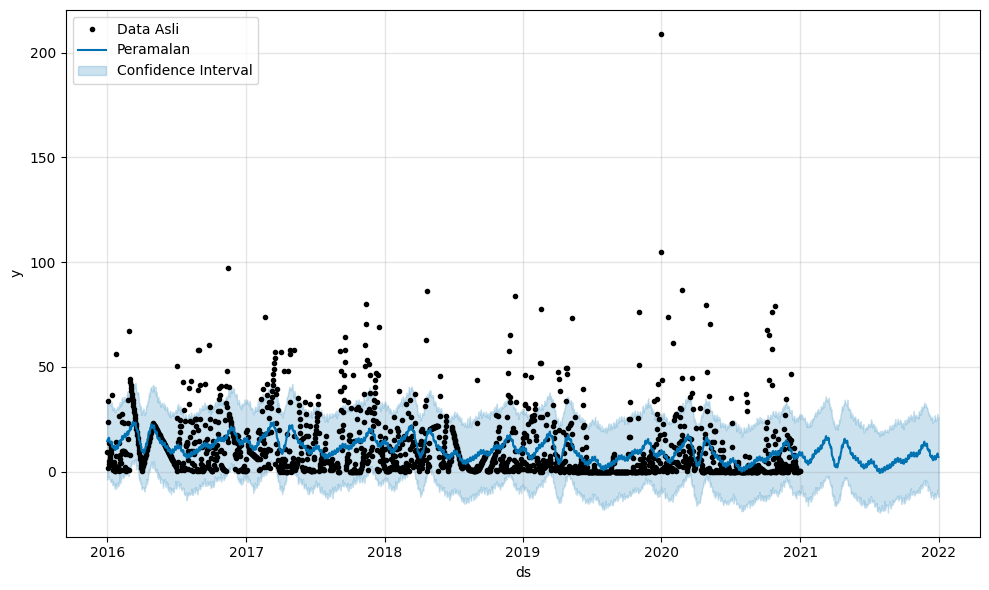

In [176]:
model_RR.plot(forecast, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [177]:
def triple_metric(forecast, column):
    mae = mean_absolute_error(forecast['yhat'][len(forecast)-720:-355], stasiun1[column][len(stasiun1)-365:])
    print('Mean Absolute Error : ',mae)
    mse = mean_squared_error(forecast['yhat'][len(forecast)-720:-355], stasiun1[column][len(stasiun1)-365:])
    print('Mean Squared Error : ',mse)
    mape = mean_absolute_percentage_error(forecast['yhat'][len(forecast)-720:-355], stasiun1[column][len(stasiun1)-365:])
    print('Mean Absolute Percentage Error : ',mape)

In [178]:
triple_metric(forecast, 'RR')

Mean Absolute Error :  8.65906838818018
Mean Squared Error :  201.70223585170652
Mean Absolute Percentage Error :  1.5936622014210415


In [179]:
predict_res_rr = forecast['yhat'][len(forecast)-720:-355]

### Create Sunshine Duration Prediction Model

In [180]:
model_ss = get_model(stasiun1, 'ss')

C:\Users\fayme amelia celesta\AppData\Local\Temp\ipykernel_14804\1345731877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
20:21:49 - cmdstanpy - INFO - Chain [1] start processing
20:21:49 - cmdstanpy - INFO - Chain [1] done processing


In [181]:
future_dates = model_ss.make_future_dataframe(periods=365, freq='D')
forecast_ss = model_ss.predict(future_dates)

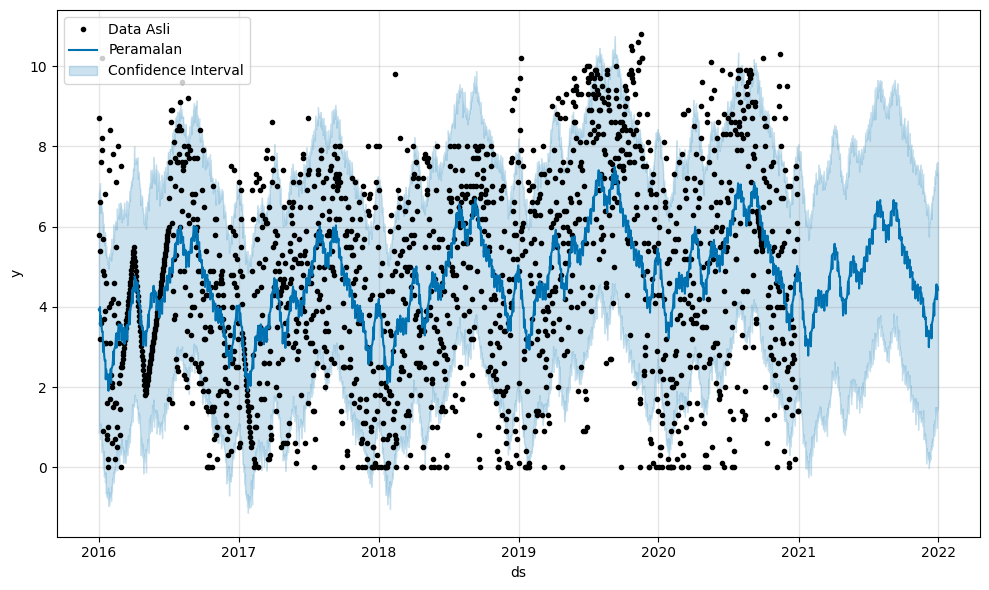

In [182]:
model_ss.plot(forecast_ss, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [183]:
triple_metric(forecast_ss, 'ss')

Mean Absolute Error :  2.251154041617564
Mean Squared Error :  7.341145410100989
Mean Absolute Percentage Error :  0.4463960956618233


In [184]:
predict_res_ss = forecast_ss['yhat'][len(forecast)-720:-355]

### Create Average Wind Direction Predict Model

In [185]:
model_ddd = get_model(stasiun1, 'ddd_x')

C:\Users\fayme amelia celesta\AppData\Local\Temp\ipykernel_14804\1345731877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
20:21:52 - cmdstanpy - INFO - Chain [1] start processing
20:21:52 - cmdstanpy - INFO - Chain [1] done processing


In [186]:
future_dates = model_ddd.make_future_dataframe(periods=365, freq='D')
forecast_ddd = model_ddd.predict(future_dates)

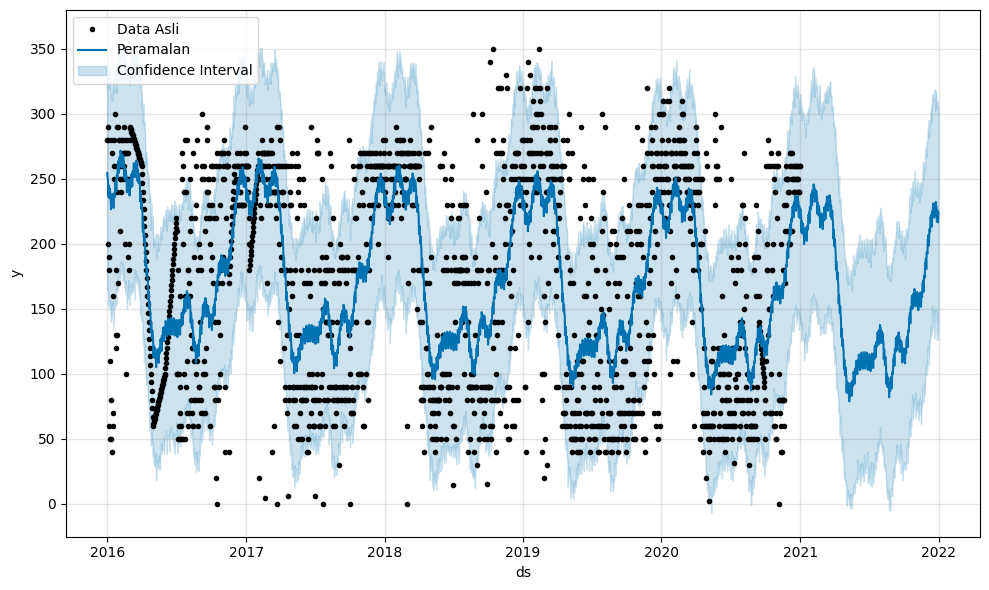

In [187]:
model_ddd.plot(forecast_ddd, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [188]:
triple_metric(forecast_ddd, 'ddd_x')

Mean Absolute Error :  53.08291616163778
Mean Squared Error :  4340.307408843931
Mean Absolute Percentage Error :  0.3707663071180354


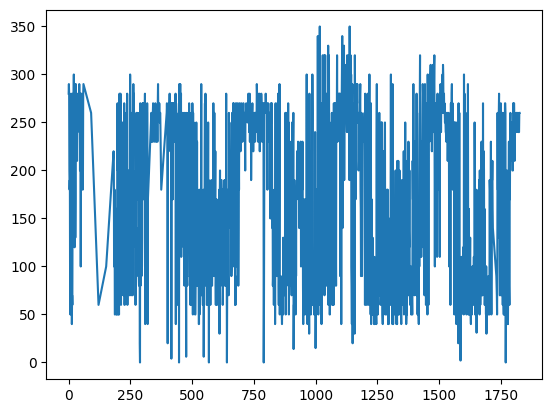

In [189]:
plt.plot(stasiun1['ddd_x'])

In [190]:
df_copy = stasiun1.copy()
df_copy.head()

,date,Tavg,RH_avg,RR,ss,ddd_x,ff_avg
0,2016-01-01,28.6,81.0,9.239964,5.8,280.0,2.0
1,2016-01-02,27.0,88.0,1.600000,8.7,290.0,2.0
2,2016-01-03,28.1,80.0,33.800000,5.4,280.0,2.0
3,2016-01-04,29.2,81.0,23.800000,6.6,200.0,1.0
4,2016-01-05,26.7,91.0,13.800000,3.2,180.0,1.0


In [191]:
# Change the measure into radiant
df_copy['ddd_x'] = df_copy['ddd_x'].apply(lambda x: x * np.pi / 180)
df_copy.head()

,date,Tavg,RH_avg,RR,ss,ddd_x,ff_avg
0,2016-01-01,28.6,81.0,9.239964,5.8,4.886922,2.0
1,2016-01-02,27.0,88.0,1.600000,8.7,5.061455,2.0
2,2016-01-03,28.1,80.0,33.800000,5.4,4.886922,2.0
3,2016-01-04,29.2,81.0,23.800000,6.6,3.490659,1.0
4,2016-01-05,26.7,91.0,13.800000,3.2,3.141593,1.0


Text(0.5, 1.0, 'ddd_x after convert into radiant')

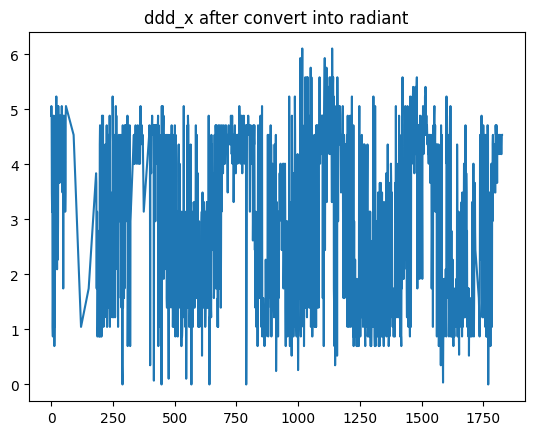

In [192]:
plt.plot(df_copy['ddd_x'])
plt.title('ddd_x after convert into radiant')

In [193]:
model_ddd_2 = get_model(df_copy, 'ddd_x')

C:\Users\fayme amelia celesta\AppData\Local\Temp\ipykernel_14804\1345731877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
20:21:57 - cmdstanpy - INFO - Chain [1] start processing
20:21:57 - cmdstanpy - INFO - Chain [1] done processing


In [194]:
future_dates = model_ddd_2.make_future_dataframe(periods=365, freq='D')
forecast_ddd_2 = model_ddd_2.predict(future_dates)

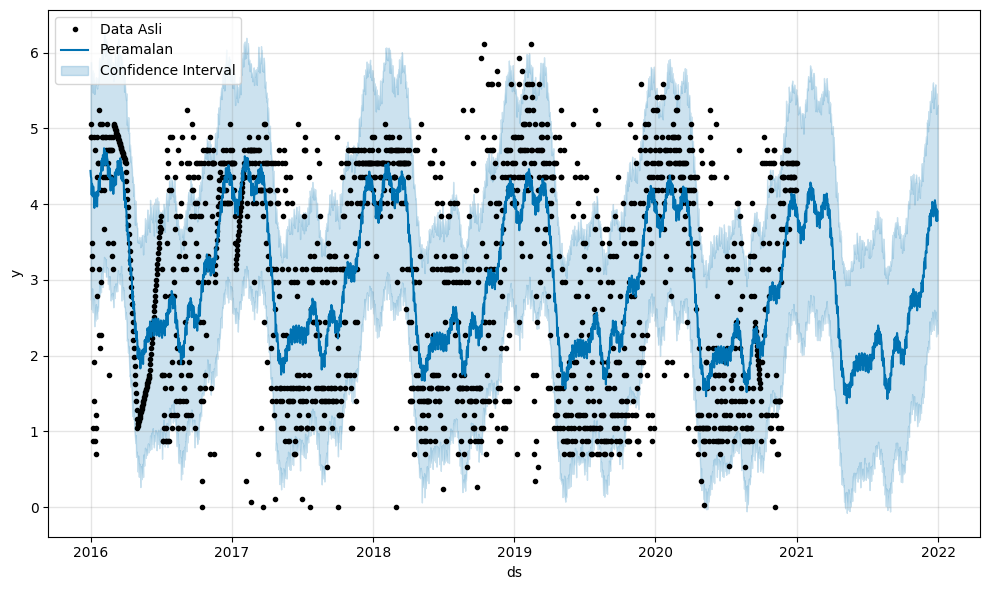

In [195]:
model_ddd_2.plot(forecast_ddd_2, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [196]:
mae = mean_absolute_error(forecast_ddd_2['yhat'][len(forecast_ddd_2)-720:-355], df_copy['ddd_x'][len(df_copy)-365:])
print('Mean Absolute Error : ',mae)
mse = mean_squared_error(forecast_ddd_2['yhat'][len(forecast_ddd_2)-720:-355], df_copy['ddd_x'][len(df_copy)-365:])
print('Mean Squared Error : ',mse)
mape = mean_absolute_percentage_error(forecast_ddd_2['yhat'][len(forecast_ddd_2)-720:-355], df_copy['ddd_x'][len(df_copy)-365:])
print('Mean Absolute Percentage Error : ',mape)

Mean Absolute Error :  0.9264544083015103
Mean Squared Error :  1.3220923068163482
Mean Absolute Percentage Error :  0.37073456776048813


In [197]:
predict_res_ddd = forecast_ddd_2['yhat'][len(forecast_ddd_2)-720:-355]

### Create Humidity Prediction Model

C:\Users\fayme amelia celesta\AppData\Local\Temp\ipykernel_14804\1345731877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
20:21:59 - cmdstanpy - INFO - Chain [1] start processing
20:21:59 - cmdstanpy - INFO - Chain [1] done processing


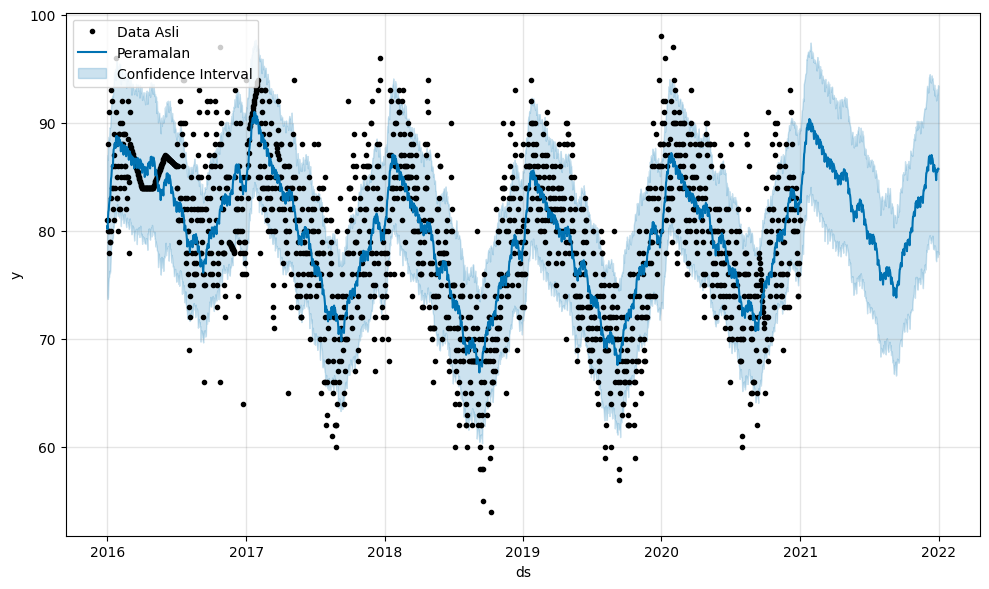

In [198]:
model_RH = get_model(stasiun1, 'RH_avg')
future_dates = model_RH.make_future_dataframe(periods=365, freq='D')
forecast_rh = model_RH.predict(future_dates)

model_RH.plot(forecast_rh, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [199]:
triple_metric(forecast_rh, 'RH_avg')

Mean Absolute Error :  4.138728364305093
Mean Squared Error :  26.779884571568633
Mean Absolute Percentage Error :  0.05219402040077517


In [200]:
predict_res_rh = forecast_rh['yhat'][len(forecast_rh)-720:-355]

### Creating Wind Speed Average Prediction Model

C:\Users\fayme amelia celesta\AppData\Local\Temp\ipykernel_14804\1345731877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
20:22:01 - cmdstanpy - INFO - Chain [1] start processing
20:22:01 - cmdstanpy - INFO - Chain [1] done processing


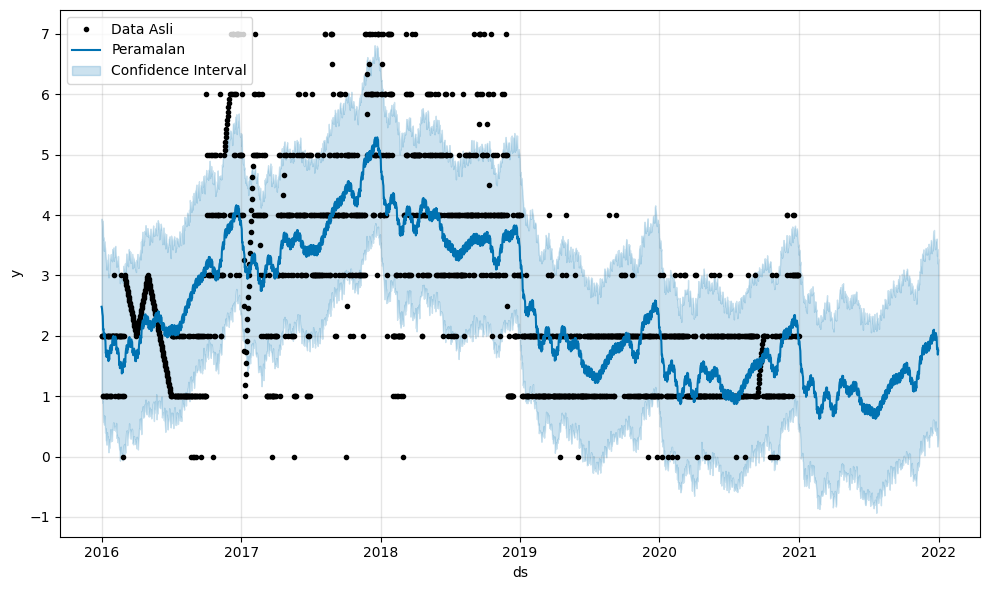

In [201]:
model_ff = get_model(stasiun1, 'ff_avg')
future_dates = model_ff.make_future_dataframe(periods=365, freq='D')
forecast_ff = model_ff.predict(future_dates)

model_ff.plot(forecast_ff, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [202]:
triple_metric(forecast_ff, 'ff_avg')

Mean Absolute Error :  0.6127728982599657
Mean Squared Error :  0.5828328319455339
Mean Absolute Percentage Error :  0.44873515368045286


In [203]:
predict_res_ff = forecast_ff['yhat'][len(forecast_ff)-720:-355]

### Create Average Temperature Prediction Model

C:\Users\fayme amelia celesta\AppData\Local\Temp\ipykernel_14804\1345731877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
20:22:03 - cmdstanpy - INFO - Chain [1] start processing
20:22:03 - cmdstanpy - INFO - Chain [1] done processing


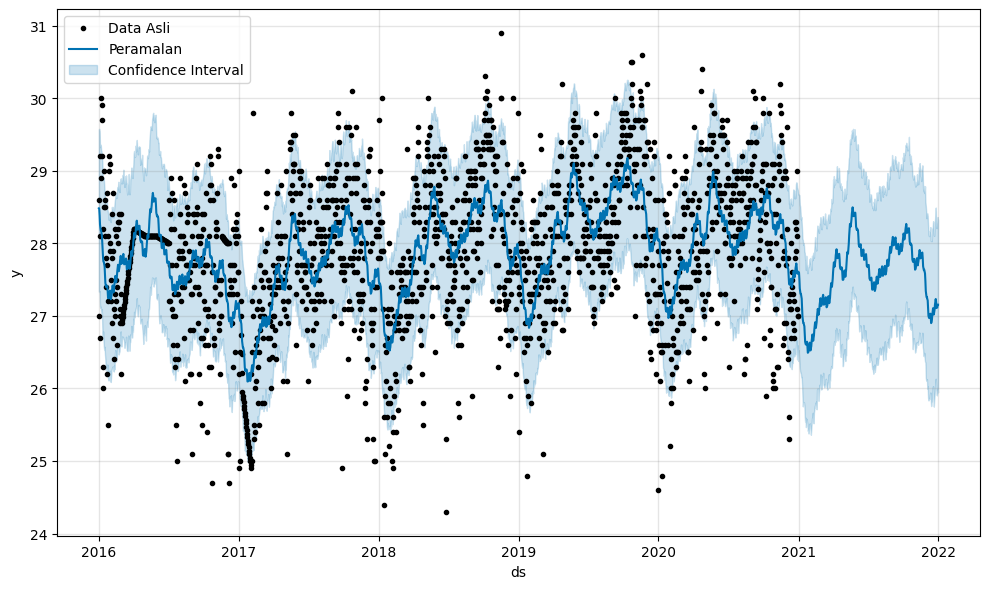

In [204]:
model_T = get_model(stasiun1, 'Tavg')
future_dates = model_T.make_future_dataframe(periods=365, freq='D')
forecast_t = model_T.predict(future_dates)

model_T.plot(forecast_t, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [205]:
triple_metric(forecast_t, 'Tavg')

Mean Absolute Error :  0.7665723751731668
Mean Squared Error :  0.908312352587604
Mean Absolute Percentage Error :  0.02737373627157782


In [206]:
predict_res_t = forecast_t['yhat'][len(forecast_t)-720:-355]

### Classification Time !!

In [207]:
import pickle

# Buka file pickle
with open('best_classify.pkl', 'rb') as f:
    rf_model = pickle.load(f)

In [208]:
predict_res_rr = predict_res_rr.to_frame(name='RR')
predict_res_t = predict_res_t.to_frame(name='Tavg')
predict_res_rh = predict_res_rh.to_frame(name='RH_avg')
predict_res_ss = predict_res_ss.to_frame(name='ss')
predict_res_ff = predict_res_ff.to_frame(name='ff_avg')
predict_res_ddd = predict_res_ddd.to_frame(name='ddd_x')

In [209]:
predict_res_rr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 1472 to 1836
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RR      365 non-null    float64
dtypes: float64(1)
memory usage: 3.0 KB


In [210]:
pred_res_2020 = pd.concat([predict_res_t, predict_res_rh, predict_res_ss, predict_res_ddd, predict_res_ff, predict_res_rr], axis=1)

In [211]:
pred_res_2020['region_name_Jakarta Selatan'] = 1
pred_res_2020['region_name_Jakarta Timur'] = 0
pred_res_2020['region_name_Jakarta Utara'] = 0

In [212]:
def convert_radian_to_degree(radian):
    return radian * (180 / np.pi)

pred_res_2020['ddd_x'] = pred_res_2020['ddd_x'].apply(convert_radian_to_degree)

In [213]:
pred_res_2020

,Tavg,RH_avg,ss,ddd_x,ff_avg,RR,region_name_Jakarta Selatan,region_name_Jakarta Timur,region_name_Jakarta Utara
1472,27.541450,83.789862,4.476094,215.394743,1.534712,7.163284,1,0,0
1473,27.404223,84.481873,4.481403,204.248915,1.506248,6.510112,1,0,0
1474,27.359641,84.656791,3.972455,214.266899,1.310517,7.392941,1,0,0
1475,27.322326,85.171795,4.181301,212.062296,1.354631,7.234228,1,0,0
1476,27.326277,85.436770,4.026902,208.555453,1.265039,5.028084,1,0,0
...,...,...,...,...,...,...,...,...,...
1832,27.304430,84.903598,4.610555,213.060017,1.526397,9.071581,1,0,0
1833,27.303008,85.234364,4.467709,207.617448,1.393903,6.946897,1,0,0
1834,27.268485,85.427483,4.334613,215.206690,1.454732,6.675890,1,0,0
1835,27.238613,85.325428,4.229278,211.615166,1.424339,7.004164,1,0,0


<Axes: >

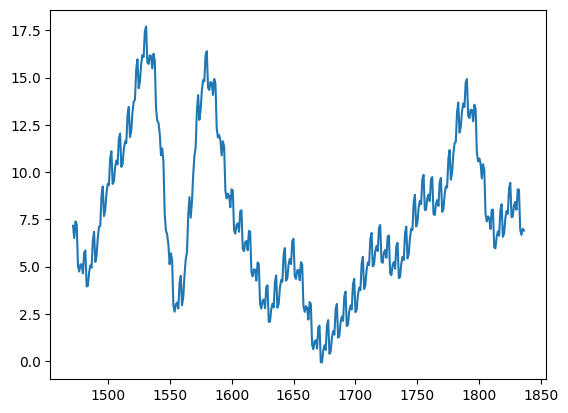

In [214]:
pred_res_2020['RR'].plot()

In [215]:
pred_res_2020

,Tavg,RH_avg,ss,ddd_x,ff_avg,RR,region_name_Jakarta Selatan,region_name_Jakarta Timur,region_name_Jakarta Utara
1472,27.541450,83.789862,4.476094,215.394743,1.534712,7.163284,1,0,0
1473,27.404223,84.481873,4.481403,204.248915,1.506248,6.510112,1,0,0
1474,27.359641,84.656791,3.972455,214.266899,1.310517,7.392941,1,0,0
1475,27.322326,85.171795,4.181301,212.062296,1.354631,7.234228,1,0,0
1476,27.326277,85.436770,4.026902,208.555453,1.265039,5.028084,1,0,0
...,...,...,...,...,...,...,...,...,...
1832,27.304430,84.903598,4.610555,213.060017,1.526397,9.071581,1,0,0
1833,27.303008,85.234364,4.467709,207.617448,1.393903,6.946897,1,0,0
1834,27.268485,85.427483,4.334613,215.206690,1.454732,6.675890,1,0,0
1835,27.238613,85.325428,4.229278,211.615166,1.424339,7.004164,1,0,0


In [216]:
flood_predict = rf_model.predict(pred_res_2020)

In [217]:
flood_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [218]:
sum = np.sum(flood_predict == 1)

In [219]:
sum

32

HyperParameter Tuning Prophet for RR

Kita menggunakan metode ParameterGrid yaitu dengan mecoba setiap kombinasi dari parameter yang telah ditentunkan. Lalu kita  lakukan memperhitungkan MAE

In [220]:
# import random
# from sklearn.model_selection import ParameterGrid
# from sklearn.metrics import mean_absolute_error

# # Daftar jenis tren pertumbuhan yang ingin dicoba
# growth_types = ['linear','logistic']

# params_grid = {
#     'seasonality_mode': ['multiplicative', 'additive'],
#     'changepoint_prior_scale': [0.1, 0.2, 0.3, 0.4, 0.5],
#     'n_changepoints': [100, 150, 200],
#     'growth': growth_types  # Menambahkan jenis tren pertumbuhan ke dalam grid parameter
# }

# grid = ParameterGrid(params_grid)

# # Inisialisasi nilai MAE terbaik dengan nilai tak terhingga
# best_mae = float('inf')  
# best_parameters = None

# for p in grid:
#     print("Testing parameters:", p)
#     random.seed(0)
    
#     future = stasiun1[['date', 'RR']].copy()
#     future.columns = ['ds', 'y']

#     if p['growth'] == 'logistic':
#         future['cap'] = 200  # Menambahkan kolom 'cap' dengan nilai 200
        
#     train_model = Prophet(
#         changepoint_prior_scale=p['changepoint_prior_scale'],
#         n_changepoints=p['n_changepoints'],
#         seasonality_mode=p['seasonality_mode'],
#         weekly_seasonality=True,
#         daily_seasonality=True,
#         yearly_seasonality=True,
#         interval_width=0.95,
#         growth=p['growth']  # Menggunakan jenis tren pertumbuhan dari grid parameter
#     )
    
#     train_model.fit(future)
    
#     future_forecast = train_model.make_future_dataframe(periods=365)
    
#     if p['growth'] == 'logistic':
#         future_forecast['cap'] = 200  # Menambahkan kolom 'cap' dengan nilai 200 pada future_forecast
        
#     forecast = train_model.predict(future_forecast)
    
#     # Menghitung MAE
#     mae = mean_absolute_error(forecast['yhat'][len(forecast)-720:-355], stasiun1['RR'][len(stasiun1)-365:])
    
#     if mae < best_mae:
#         best_mae = mae
#         best_parameters = p

# print("Best Parameters:", best_parameters)
# print("Best MAE:", best_mae)


In [221]:
def get_model2(data, column):
    df_train = data[['date', column]].copy()
    df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
    
    # Tambahkan kolom 'cap' dengan nilai kapasitas
    df_train['cap'] = 200  # Misalnya, berikan kapasitas 200 untuk setiap baris
    
    my_model = Prophet(changepoint_prior_scale=0.5, 
                       n_changepoints=200, 
                       seasonality_mode='multiplicative',
                       growth='logistic')  
    my_model.fit(df_train)
    
    return my_model


In [222]:
model_RR2 =  get_model2(stasiun1, 'RR')

20:22:06 - cmdstanpy - INFO - Chain [1] start processing
20:22:06 - cmdstanpy - INFO - Chain [1] done processing


In [223]:
future_dates2 = model_RR2.make_future_dataframe(periods=365, freq='D')
future_dates2.shape[0]
future_dates2['cap'] = 200 


In [224]:
forecast2 = model_RR2.predict(future_dates2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2016-01-01,14.506432,-3.840582,33.493843
1,2016-01-02,14.431263,-4.195121,32.425913
2,2016-01-03,14.987949,-2.837951,32.529543
3,2016-01-04,14.840868,-4.545841,33.727787
4,2016-01-05,15.988777,-1.641986,33.470433


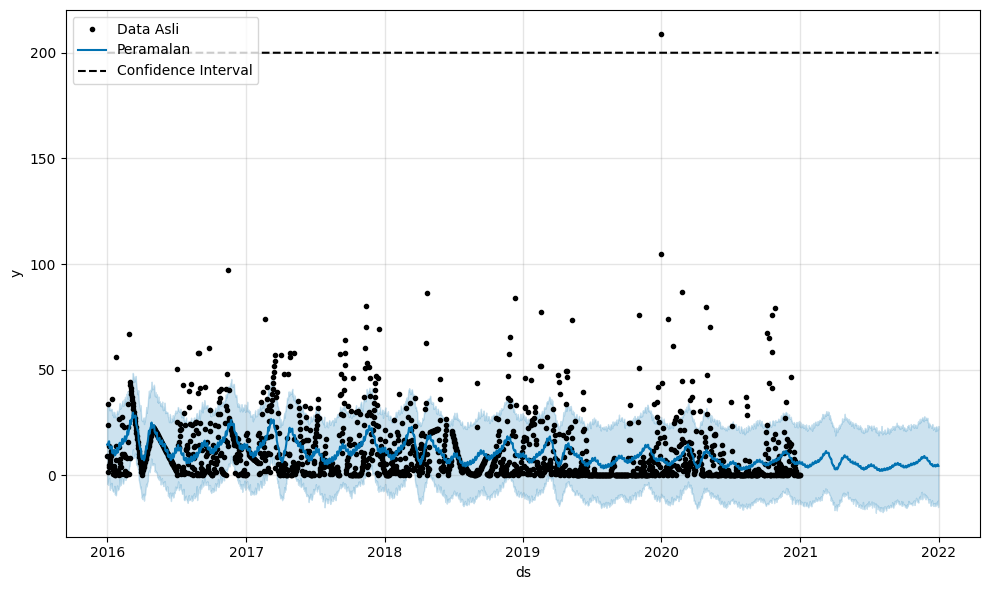

In [225]:
model_RR2.plot(forecast2, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [226]:
def triple_metric(forecast, column):
    mae = mean_absolute_error(forecast['yhat'][len(forecast)-720:-355], stasiun1[column][len(stasiun1)-365:])
    print('Mean Absolute Error : ',mae)
    mse = mean_squared_error(forecast['yhat'][len(forecast)-720:-355], stasiun1[column][len(stasiun1)-365:])
    print('Mean Squared Error : ',mse)
    mape = mean_absolute_percentage_error(forecast['yhat'][len(forecast)-720:-355], stasiun1[column][len(stasiun1)-365:])
    print('Mean Absolute Percentage Error : ',mape)

In [227]:
triple_metric(forecast2, 'RR')

Mean Absolute Error :  8.519360013956469
Mean Squared Error :  203.4957180854335
Mean Absolute Percentage Error :  1.2797426967796361


In [228]:
predict_res_rr2 = forecast2['yhat'][len(forecast)-720:-355]

In [229]:
predict_res_rr2 = predict_res_rr2.to_frame(name='RR')

In [230]:
pred_res_2020_tuning = pd.concat([predict_res_t, predict_res_rh, predict_res_ss, predict_res_ddd, predict_res_ff, predict_res_rr2], axis=1)


In [231]:
pred_res_2020_tuning['region_name_Jakarta Selatan'] = 1
pred_res_2020_tuning['region_name_Jakarta Timur'] = 0
pred_res_2020_tuning['region_name_Jakarta Utara'] = 0

In [232]:
def convert_radian_to_degree(radian):
    return radian * (180 / np.pi)

pred_res_2020_tuning['ddd_x'] = pred_res_2020_tuning['ddd_x'].apply(convert_radian_to_degree)

In [233]:
flood_predict2 = rf_model.predict(pred_res_2020_tuning)

In [234]:
flood_predict2

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [235]:
sum2 = np.sum(flood_predict2 == 1)
sum2

34

## Perhitungkan MAPE

Selanjutnya kita akan mencoba dengan memperhitungkan MAPE

In [236]:
# import random
# from sklearn.model_selection import ParameterGrid
# from sklearn.metrics import mean_absolute_percentage_error

# params_grid = {
#     'seasonality_mode': ('multiplicative', 'additive'),
#     'changepoint_prior_scale': [0.1, 0.2, 0.3, 0.4, 0.5],
#     'n_changepoints': [100, 150, 200]
# }

# grid = ParameterGrid(params_grid)

# best_mape = float('inf')  # Inisialisasi nilai MAPE terbaik dengan nilai tak terhingga

# for p in grid:
#     print(p)
#     random.seed(0)
#     train_model = Prophet(
#         changepoint_prior_scale=p['changepoint_prior_scale'],
#         n_changepoints=p['n_changepoints'],
#         seasonality_mode=p['seasonality_mode'],
#         weekly_seasonality=True,
#         daily_seasonality=True,
#         yearly_seasonality=True,
#         interval_width=0.95
#     )
    
#     future = stasiun1[['date', 'RR']].copy()
#     future.columns = ['ds', 'y']
#     train_model.fit(future)
    
#     future_forecast = train_model.make_future_dataframe(periods=365)
#     forecast = train_model.predict(future_forecast)
    
#     mape = mean_absolute_percentage_error(forecast['yhat'][len(forecast)-720:-355], stasiun1['RR'][len(stasiun1)-365:])
    
#     if mape < best_mape:
#         best_mape = mape
#         best_parameters = p

# print("Best Parameters:", best_parameters)
# print("Best MAPE:", best_mape)


Best Parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'n_changepoints': 150, 'seasonality_mode': 'additive'}
Ini mape dengan logistic tapi untuk prediksi banjir turun dan kalau di metric jadi beda

In [237]:
def get_model3(data, column):
    df_train = data[['date', column]].copy()
    df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
    
    # Tambahkan kolom 'cap' dengan nilai kapasitas
    my_model = Prophet(changepoint_prior_scale=0.2, 
                       n_changepoints=150, 
                       seasonality_mode='multiplicative'
                       )  
    my_model.fit(df_train)
    
    return my_model

In [238]:
model_RR3 =  get_model3(stasiun1, 'RR')

20:22:12 - cmdstanpy - INFO - Chain [1] start processing
20:22:13 - cmdstanpy - INFO - Chain [1] done processing


In [239]:
future_dates3 = model_RR3.make_future_dataframe(periods=365, freq='D')
future_dates3.shape[0]


2192

In [240]:
forecast3 = model_RR3.predict(future_dates3)
forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2016-01-01,12.935743,-5.270723,30.806269
1,2016-01-02,12.945914,-3.917387,32.478854
2,2016-01-03,13.285354,-4.238966,31.644534
3,2016-01-04,13.156661,-4.372847,30.996789
4,2016-01-05,14.426878,-3.419855,32.495287


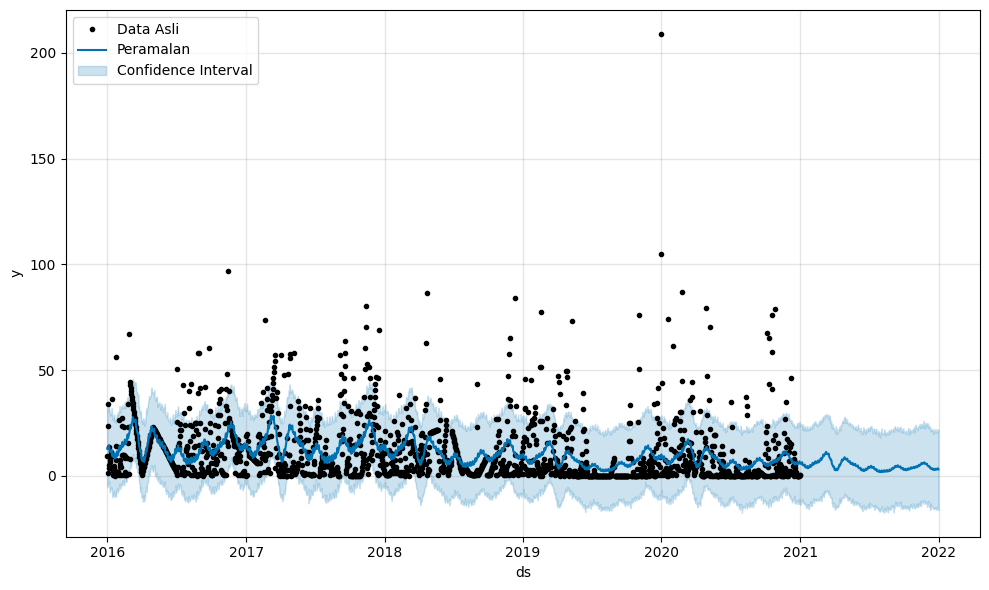

In [241]:
model_RR3.plot(forecast3, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [242]:
def triple_metric(forecast, column):
    mae = mean_absolute_error(forecast['yhat'][len(forecast)-720:-355], stasiun1[column][len(stasiun1)-365:])
    print('Mean Absolute Error : ',mae)
    mse = mean_squared_error(forecast['yhat'][len(forecast)-720:-355], stasiun1[column][len(stasiun1)-365:])
    print('Mean Squared Error : ',mse)
    mape = mean_absolute_percentage_error(forecast['yhat'][len(forecast)-720:-355], stasiun1[column][len(stasiun1)-365:])
    print('Mean Absolute Percentage Error : ',mape)

In [243]:
triple_metric(forecast3, 'RR')

Mean Absolute Error :  8.79312538050173
Mean Squared Error :  202.4304149492095
Mean Absolute Percentage Error :  1.2114444201694337


In [244]:
predict_res_rr3 = forecast3['yhat'][len(forecast)-720:-355]

In [245]:
predict_res_rr3 = predict_res_rr3.to_frame(name='RR')

In [246]:
pred_res_2020_tuning2 = pd.concat([predict_res_t, predict_res_rh, predict_res_ss, predict_res_ddd, predict_res_ff, predict_res_rr3], axis=1)

In [247]:
pred_res_2020_tuning2['region_name_Jakarta Selatan'] = 1
pred_res_2020_tuning2['region_name_Jakarta Timur'] = 0
pred_res_2020_tuning2['region_name_Jakarta Utara'] = 0

In [248]:
def convert_radian_to_degree(radian):
    return radian * (180 / np.pi)

pred_res_2020_tuning2['ddd_x'] = pred_res_2020_tuning2['ddd_x'].apply(convert_radian_to_degree)

In [249]:
flood_predict3 = rf_model.predict(pred_res_2020_tuning2)
flood_predict3

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [250]:
sum3 = np.sum(flood_predict3 == 1)
sum3

45

### Check metrics value with the actual label

In [251]:
df_overall = pd.read_csv('C:\\Users\\fayme amelia celesta\\Documents\\VScode\\Github\\Intern-BCC-2024\\Dataset\\Processed\\df_fix.csv')

In [252]:
y_test = df_overall[(df_overall['region_name']=='Jakarta Selatan')]
y_test

,Unnamed: 0,date,Tavg,RH_avg,ss,ddd_x,ff_avg,RR,ddd_car,region_name,flood
0,0,2016-01-01,28.6,81.0,5.8,280.0,2.0,9.239964,S,Jakarta Selatan,0
1,1,2016-01-02,27.0,88.0,8.7,290.0,2.0,1.600000,W,Jakarta Selatan,1
2,2,2016-01-03,28.1,80.0,5.4,280.0,2.0,33.800000,SW,Jakarta Selatan,1
3,3,2016-01-04,29.2,81.0,6.6,200.0,1.0,23.800000,S,Jakarta Selatan,0
4,4,2016-01-05,26.7,91.0,3.2,180.0,1.0,13.800000,S,Jakarta Selatan,0
...,...,...,...,...,...,...,...,...,...,...,...
1653,1653,2020-12-27,29.0,74.0,5.7,240.0,2.0,0.000000,SW,Jakarta Selatan,0
1654,1654,2020-12-28,28.1,77.0,6.8,240.0,3.0,0.050000,SW,Jakarta Selatan,0
1655,1655,2020-12-29,27.1,82.0,6.1,240.0,3.0,0.100000,SW,Jakarta Selatan,0
1656,1656,2020-12-30,27.0,81.0,1.4,260.0,2.0,0.300000,W,Jakarta Selatan,0


In [253]:
y_test.drop(columns=['Unnamed: 0'], inplace=True)
y_test['date'] = pd.to_datetime(stasiun1['date'])

C:\Users\fayme amelia celesta\AppData\Local\Temp\ipykernel_14804\2467531513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test.drop(columns=['Unnamed: 0'], inplace=True)
C:\Users\fayme amelia celesta\AppData\Local\Temp\ipykernel_14804\2467531513.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['date'] = pd.to_datetime(stasiun1['date'])


In [254]:
y_test = y_test[(y_test['date']>'2020-01-01')&(y_test['date']<'2020-12-31')]
y_test.set_index('date', inplace=True)
y_test = y_test['flood']

In [255]:
y_test

date
2020-01-02    0
2020-01-03    0
2020-01-04    0
2020-01-05    0
2020-01-06    0
             ..
2020-07-11    0
2020-07-12    0
2020-07-13    0
2020-07-14    0
2020-07-15    0
Name: flood, Length: 196, dtype: int64

In [256]:
flood_predict3

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [257]:
print(len(y_test))
print(len(flood_predict3))

196
365


In [258]:
dates = pd.date_range('2020-01-01', periods=len(flood_predict3))
y_predict3 = pd.DataFrame(flood_predict3, index=dates)

In [259]:
y_predict3

,0
2020-01-01,0
2020-01-02,0
2020-01-03,0
2020-01-04,0
2020-01-05,0
...,...
2020-12-26,0
2020-12-27,0
2020-12-28,0
2020-12-29,0


In [260]:
# menyamakan index dari data awal yang memiliki index tanggal tidak lengkap
unique_dates = y_test.index.unique()
y_pred_filtered = y_predict3[y_predict3.index.isin(unique_dates)]

In [261]:
print(len(y_test))
print(len(y_pred_filtered))

196
196


In [262]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

In [266]:
accuracy = accuracy_score(y_test, y_pred_filtered)
print("Accuracy:", accuracy)

Accuracy: 0.7448979591836735


### Forecasting the flood on the future (based on the last index in dataset)

In [308]:
forecast_t_2021 = forecast_t['yhat'][len(forecast_t)-365:].to_frame()
forecast_rr_2021 = forecast3['yhat'][len(forecast3)-365:].to_frame()
forecast_rh_2021 = forecast_rh['yhat'][len(forecast_rh)-365:].to_frame()
forecast_ss_2021 = forecast_ss['yhat'][len(forecast_ss)-365:].to_frame()
forecast_ddd_2021 = forecast_ddd['yhat'][len(forecast_ddd)-365:].to_frame()
forecast_ff_2021 = forecast_ff['yhat'][len(forecast_ff)-365:].to_frame()

In [309]:
forecast_t_2021.rename(columns={'yhat':'Tavg'}, inplace=True)
forecast_rr_2021.rename(columns={'yhat':'RR'}, inplace=True)
forecast_rh_2021.rename(columns={'yhat':'RH_avg'}, inplace=True)
forecast_ss_2021.rename(columns={'yhat':'ss'}, inplace=True)
forecast_ddd_2021.rename(columns={'yhat':'ddd_x'}, inplace=True)
forecast_ff_2021.rename(columns={'yhat':'ff_avg'}, inplace=True)

In [311]:
pred_res_2021 = pd.concat([forecast_t_2021, forecast_rh_2021, forecast_ss_2021, forecast_ddd_2021, forecast_ff_2021, forecast_rr_2021], axis=1)

In [312]:
pred_res_2021

,Tavg,RH_avg,ss,ddd_x,ff_avg,RR
1827,27.602627,82.893308,4.819825,226.725766,1.919556,5.827096
1828,27.595658,82.638009,4.779313,222.525611,1.883825,5.806976
1829,27.505137,83.588013,4.796964,221.098205,1.801932,5.934957
1830,27.379906,84.213254,4.850372,208.587962,1.747958,5.852525
1831,27.341449,84.366127,4.377697,217.024296,1.520177,6.399080
...,...,...,...,...,...,...
2187,27.107919,85.623493,4.560098,216.620053,1.980228,3.130246
2188,27.113372,85.467126,4.188759,225.535313,1.779505,3.498119
2189,27.117882,85.713865,4.520326,221.792434,1.806307,3.583808
2190,27.154775,85.778425,4.471815,216.329909,1.687380,3.013296


In [313]:
pred_res_2021['region_name_Jakarta Selatan'] = 1
pred_res_2021['region_name_Jakarta Timur'] = 0
pred_res_2021['region_name_Jakarta Utara'] = 0

In [316]:
flood_predict_2021 = rf_model.predict(pred_res_2021)
flood_predict_2021

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [317]:
np.sum(flood_predict_2021 == 1)

70